<img src="https://kuwaitjobvacancy.com/wp-content/uploads/2017/07/New-York-JOBS.png" width="640" height="426">

In [1]:
!pip install squarify
!pip install bubbly

  Created wheel for bubbly: filename=bubbly-1.0.2-cp36-none-any.whl size=5428 sha256=044c1fd41bd4e55bbce0e6518b1cff1b6acff09daa8b14be2c9badef3e213144
  Stored in directory: /tmp/.cache/pip/wheels/cf/3c/75/8c09dbf7cd6b320b69a6bc679fd111abd1139866c722b1476b
Successfully built bubbly


In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import folium
from folium.plugins import FastMarkerCluster
from wordcloud import WordCloud
from nltk.corpus import stopwords
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from bubbly.bubbly import bubbleplot
import squarify

import os
print(os.listdir("../input"))

['NYC Jobs Data Dictionary_Sep17.xlsx', 'socrata_metadata.json', 'nyc-jobs.csv']


<div align='left'><font size="6" color="#ff3fb5">Data Description</font></div>
&nbsp;

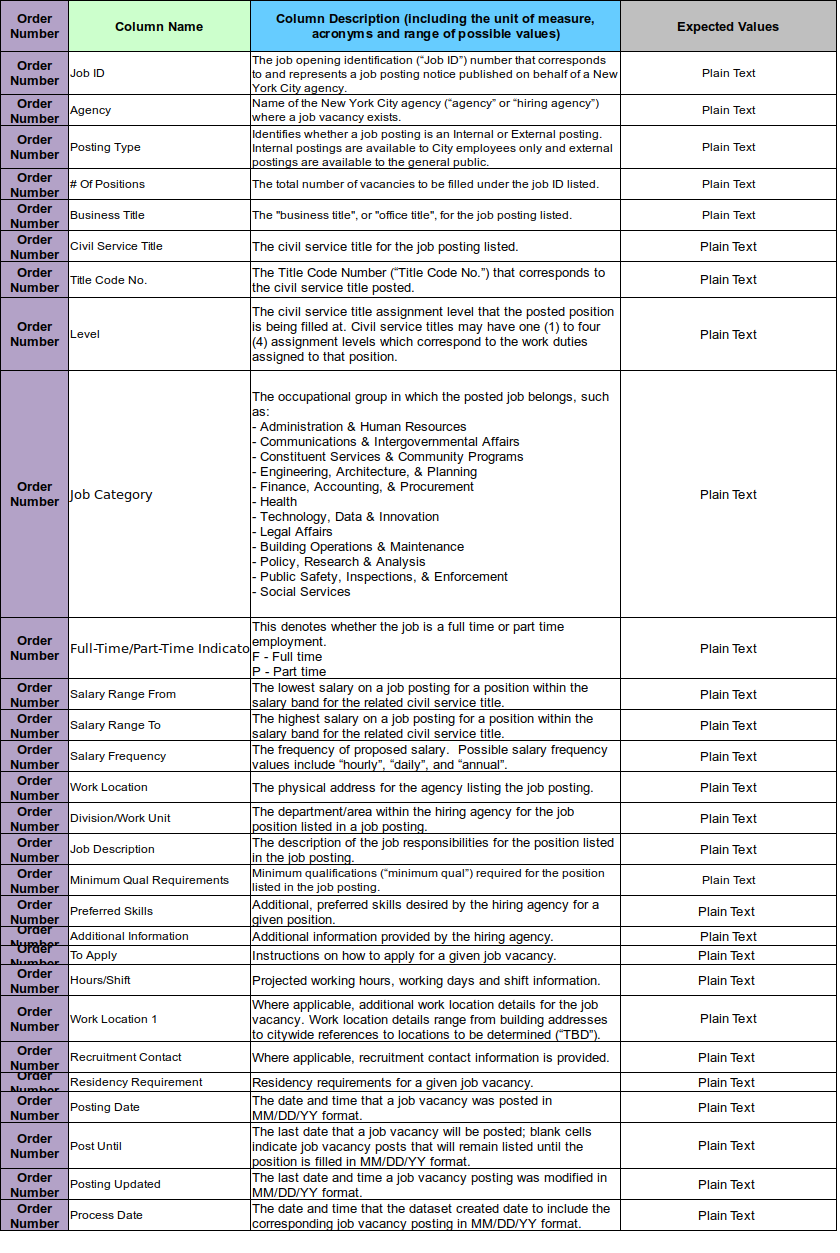

In [3]:
df = pd.read_csv('../input/nyc-jobs.csv')
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-07-30T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-07-30T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-30T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-30T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-07-30T00:00:00.000


In [4]:
print("There are {} rows and {} columns in our data".format(df.shape[0], df.shape[1]))

There are 3123 rows and 28 columns in our data


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 28 columns):
Job ID                           3123 non-null int64
Agency                           3123 non-null object
Posting Type                     3123 non-null object
# Of Positions                   3123 non-null int64
Business Title                   3123 non-null object
Civil Service Title              3123 non-null object
Title Code No                    3123 non-null object
Level                            3123 non-null object
Job Category                     3121 non-null object
Full-Time/Part-Time indicator    2854 non-null object
Salary Range From                3123 non-null float64
Salary Range To                  3123 non-null float64
Salary Frequency                 3123 non-null object
Work Location                    3123 non-null object
Division/Work Unit               3123 non-null object
Job Description                  3123 non-null object
Minimum Qual Requirements    

<div align='center'><font size="6" color="#ff3fb5">Getting Started</font></div>

In [6]:
def pie_plot(cnts, colors, title):
    labels = cnts.index
    values = cnts.values
    
    trace = go.Pie(labels=labels,
                   values=values,
                   title=title,
                   textinfo='value',
                   hoverinfo='label+percent',
                   hole=.77,
                   textposition='inside',
                   marker=dict(colors=colors,
                               line=dict(color='#000000', width=2)
                              )
                  )
    return trace

<div align='center'><font size="5" color="#ff3fb5">Posting Types</font></div>

In [7]:
py.iplot([pie_plot(df['Posting Type'].value_counts(), ['gold', 'cyan'], 'Posting Types')])

> * Posting Types are mostly internal 
> * Companies prefer city employees than an external employee

<div align='center'><font size="6" color="#ff3fb5">Which type of position has most vacancies?</font></div>

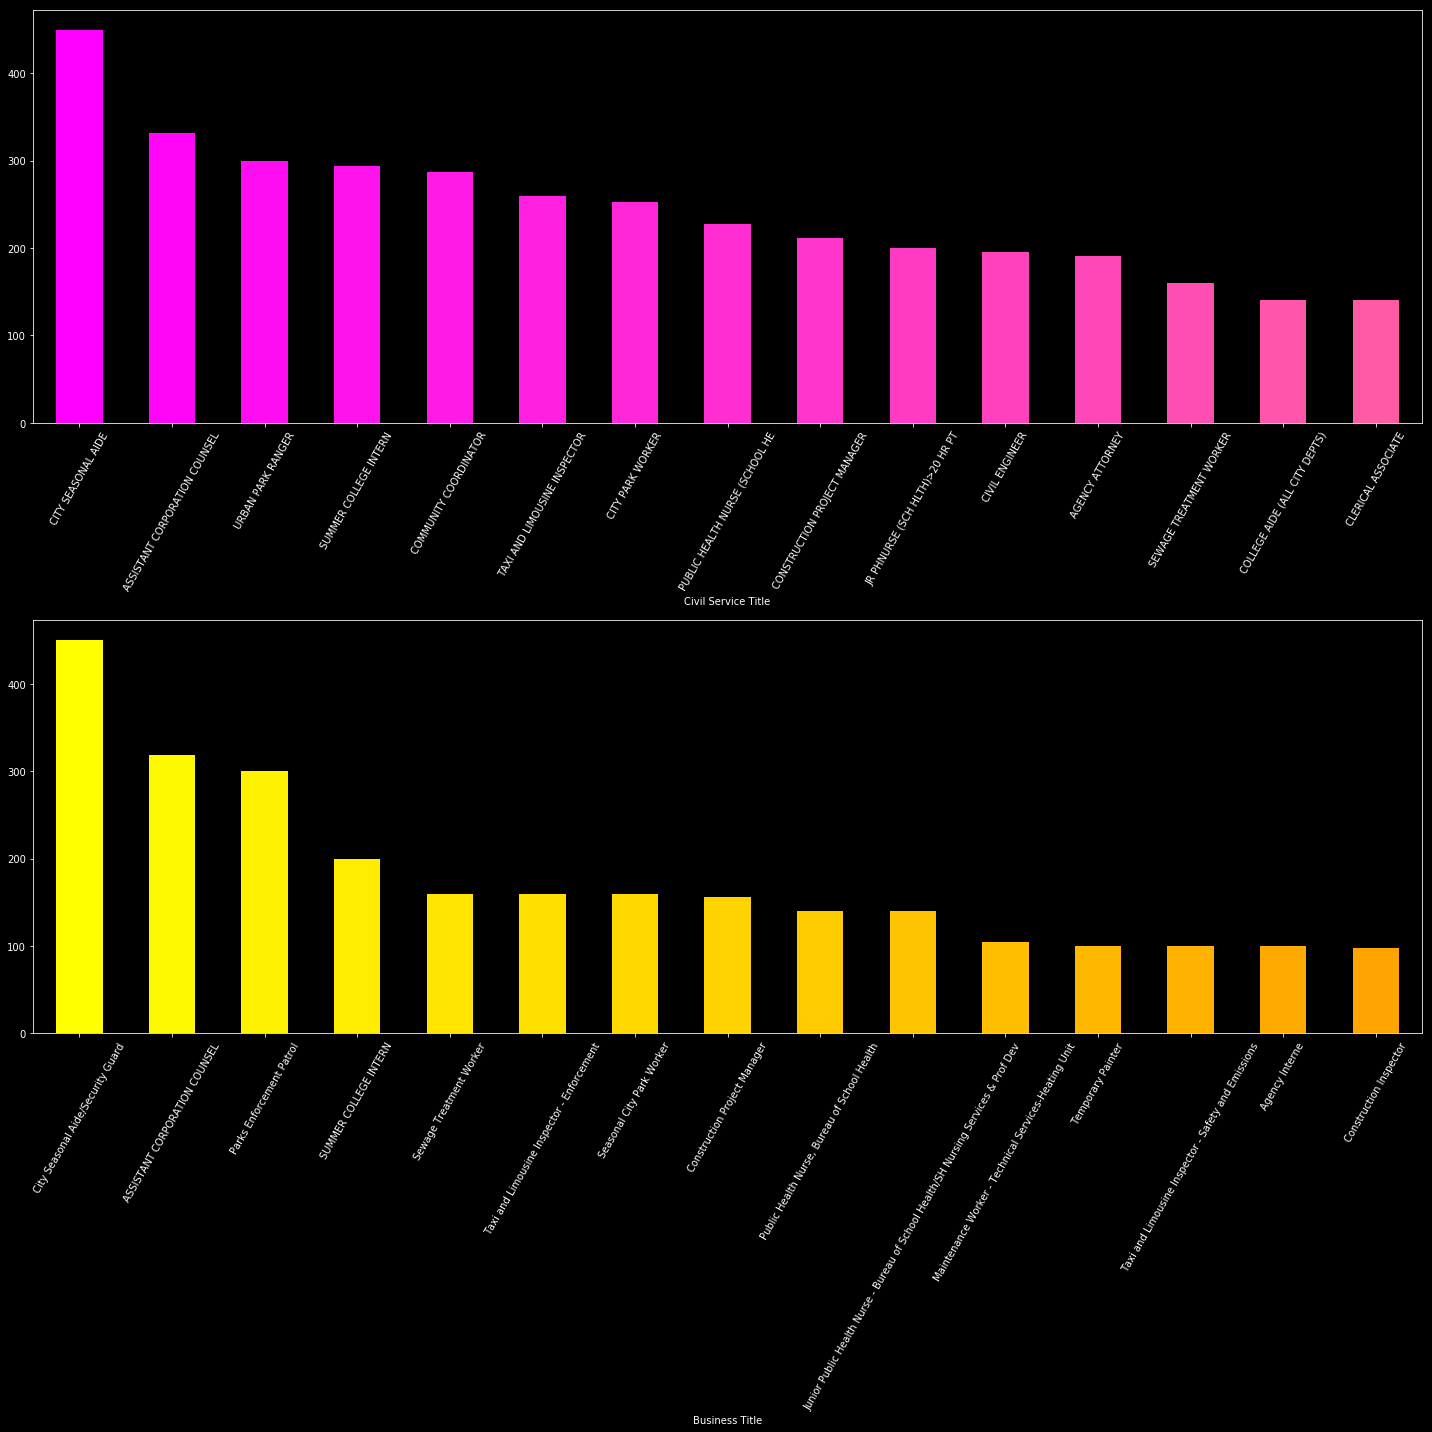

In [8]:
plt.style.use('dark_background')
plt.figure(figsize=(20,20))

vacancies = df.groupby(by='Civil Service Title')['# Of Positions'].sum().sort_values(ascending=False).head(15)
plt.subplot(211)
color = plt.cm.spring(np.linspace(0, 1, 40))
vacancies.plot.bar(color=color)
plt.xticks(rotation=60)

vacancies = df.groupby(by='Business Title')['# Of Positions'].sum().sort_values(ascending=False).head(15)
plt.subplot(212)
color = plt.cm.autumn_r(np.linspace(0, 1, 40))
vacancies.plot.bar(color=color)
plt.xticks(rotation=60)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()

>* City Park Worker, City Seasonal Aide, Assistant Coorporation Counsel have the most vacancies

<div align='center'><font size="6" color="#ff3fb5">Job Categories</font></div>

In [9]:
def createhmap(keys, vals):
    x = 0.
    y = 0.
    width = 100.
    height = 100.
    colcnt = 0
    values = vals

    normed = squarify.normalize_sizes(values, width, height)
    rects = squarify.squarify(normed, x, y, width, height)

    color_brewer = ['#f4c242']
    shapes = []
    annotations = []
    counter = 0

    for r in rects:
        shapes.append( 
            dict(
                type = 'rect', 
                x0 = r['x'], 
                y0 = r['y'], 
                x1 = r['x']+r['dx'], 
                y1 = r['y']+r['dy'],
                line = dict( width = 5, color="#fff" ),
                fillcolor = '#f4c242'
            ) 
        )
        annotations.append(
            dict(
                x = r['x']+(r['dx']/2),
                y = r['y']+(r['dy']/2),
                text = str(list(keys)[counter]) +" ("+ str(values[counter]) + ")",
                showarrow = False
            )
        )
        counter = counter + 1
        colcnt+=1
        if colcnt >= len(color_brewer):
            colcnt = 0

    # For hover text
    trace0 = go.Scatter(
        x = [ r['x']+(r['dx']/2) for r in rects ], 
        y = [ r['y']+(r['dy']/2) for r in rects ],
        text = [ str(v)+" ("+str(values[k])+" )" for k,v in enumerate(keys) ], 
        mode = 'text',
    )

    layout = dict(
        height=500, width=900,
        margin = dict(l=100),
        xaxis=dict(
                autorange=True,
                showgrid=False,
                zeroline=False,
                showline=False,
                ticks='',
                showticklabels=False
            ),
        yaxis=dict(
                autorange=True,
                showgrid=False,
                zeroline=False,
                showline=False,
                ticks='',
                showticklabels=False
            ),
        shapes=shapes,
        annotations=annotations,
        title="Top Job Categories"
    )
    
    figure = dict(data=[trace0], layout=layout)
    py.iplot(figure)

categories = df['Job Category'].value_counts().sort_values(ascending=False).head(5)
createhmap(list(categories.index), list(categories.values))

>* Engineering Architecture & Planning, Technology Data & Innovation, Public Safety, Inspection & Enforcement have most number of job opportunities

<div align='center'><font size="6" color="#ff3fb5">Highest Average Starting Salary Job?</font></div>

In [10]:
salaries = df.groupby('Civil Service Title')['Salary Range From'].sum().sort_values(ascending=False).head(15)

trace1 = go.Bar(x=salaries.values, 
                y=salaries.index, 
                width=0.6,
                marker=dict(
                    color='#54d1f7', 
                    line=dict(
                        color='#54d1f7', 
                        width=1.5)
                ),
                orientation='h', name='Highest Average Starting Salary')

layout = dict(showlegend=False,
              title='Highest Average Starting Salaries',
              yaxis=dict(
                  showgrid=False,
                  showline=False,
                  showticklabels=True,
              ),
             xaxis=dict(
                  title='Salaries',
                  zeroline=False,
                  showline=False,
                  showticklabels=True,
                  showgrid=False,
             ),
             margin = dict(l=300, r=20, t=50, b=50),
            )
fig = go.Figure(data=[trace1], layout=layout)
py.iplot(fig)

>* Used Civil Service titles as they are well organized
>* Community Coordinator, Civil Engineer, Agency Attorney are highest average starting salary jobs

<div align='center'><font size="6" color="#ff3fb5">Highest Salary Job?</font></div>

In [11]:
salaries = df.groupby('Civil Service Title')['Salary Range To'].mean().sort_values(ascending=False).head(15)

trace1 = go.Bar(y=salaries.index, x=salaries.values, width=0.6, 
                marker=dict(color='red',
                            opacity=0.6,
                            line=dict(color='red',
                                      width=1.5)
                           ),
               orientation='h', name='Highest Salary Jobs')

layout = dict(showlegend=False,
             title='Highest Salary Jobs',
             yaxis=dict(
                 showgrid=False,
                 showline=False,
                 showticklabels=True,
             ),
             xaxis=dict(
                 title='Salaries',
                 showgrid=False,
                 showline=False,
                 showticklabels=True
             ),
             margin=dict(l=300, r=20, t=50, b=50),
            )

fig = go.Figure(data=[trace1], layout=layout)
py.iplot(fig)

>* Senior General Deputy Manager, Executive Deputy Commissioner, Deputy Commissioner are highest paying jobs 

<div align='center'><font size="6" color="#ff3fb5">Salary Frequency</font></div>

In [12]:
freq = df['Salary Frequency'].value_counts()
py.iplot([pie_plot(freq, colors=['#E1396C', '#96D38C', '#D0F9B1'], title='Salary Frequency')])

>* 2873 jobs are based on annual salary frequency

<div align='center'><font size="6" color="#ff3fb5">Full Time or Part Time Jobs?</font></div>

In [13]:
py.iplot([pie_plot(df['Full-Time/Part-Time indicator'].value_counts(), ['orange', 'purple'], 'Job Type')])

>* 94.6% of the Jobs are Full Time
>* There are more chances to get a job if you are willing to work full time

<div align='center'><font size="6" color="#ff3fb5">Find the best job for you</font></div>

In [14]:
df['start'] = round(df['Salary Range From'])
df['start'] = df['start'].astype('int')

df['end'] = round(df['Salary Range To'])
df['end'] = df['end'].astype('int')


fig = bubbleplot(df, x_column='start', y_column='end', bubble_column='Agency', size_column='# Of Positions', x_title='Starting Salary', color_column='Agency', 
                 y_title='Salary Range till', title='Finding the right job', x_logscale=False, scale_bubble=3, height=650)

py.iplot(fig)

<div align='center'><font size="6" color="#ff3fb5">Most Busy Locations</font></div>

In [15]:
locations = df['Work Location'].value_counts().sort_values(ascending=False).head(15)

trace1 = go.Bar(x=locations.values, 
                y=locations.index, 
                width=0.6,
                marker=dict(
                    color='#8ddcf4', 
                    line=dict(
                        color='#54d1f7', 
                        width=1.5)
                ),
                orientation='h', name='Job Locations')

layout = dict(showlegend=False,
              title='Most Busy Locations',
              yaxis=dict(
                  showgrid=False,
                  showline=False,
                  showticklabels=True,
              ),
             xaxis=dict(
                  title='Jobs',
                  zeroline=False,
                  showline=False,
                  showticklabels=True,
                  showgrid=False,
             ),
             margin = dict(l=300, r=20, t=50, b=50),
            )
fig = go.Figure(data=[trace1], layout=layout)
py.iplot(fig)

>* 96-05 Horace Harding Expway, 30-30 Thomson Ave L I City Qns etc are the places with most job opportunities

<div align='center'><font size="6" color="#ff3fb5">Minimum Qualification And Preferred Skills</font></div>

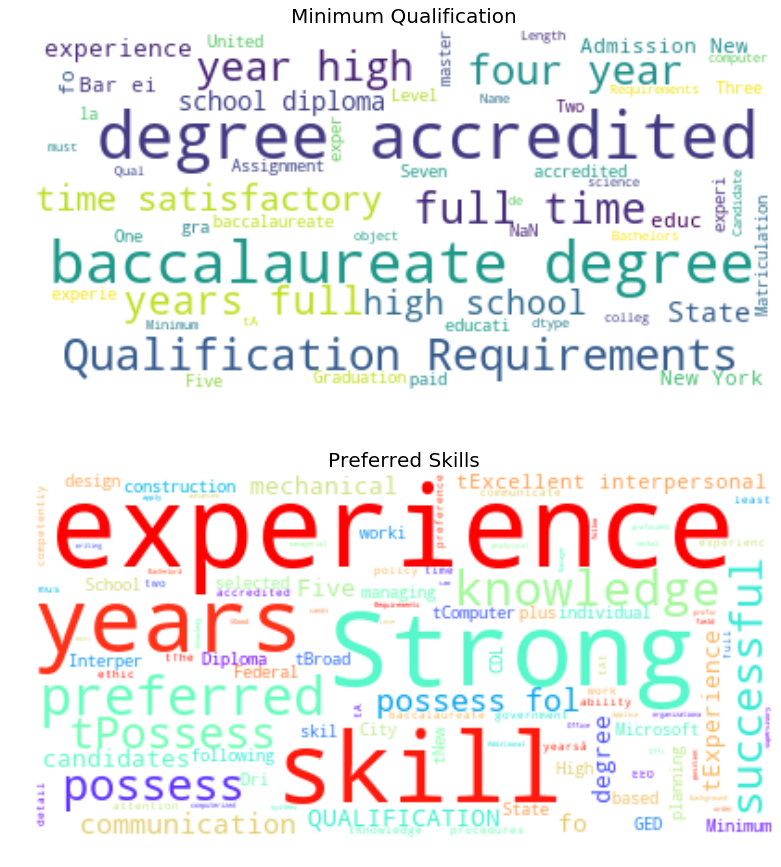

In [16]:
from nltk.corpus import stopwords
plt.style.use('ggplot')
plt.figure(figsize=(15, 15))

plt.subplot(211)
wc = WordCloud(background_color='white', max_words=100, stopwords=stopwords.words('english'))
plt.imshow(wc.generate_from_text(str(df['Minimum Qual Requirements'])), interpolation='bilinear')
title = plt.title('Minimum Qualification', fontsize=20)
plt.setp(title, color='black')
plt.axis("off")

plt.subplot(212)
stopwords = list(stopwords.words('english'))
stopwords.extend(['NaN', 'Candidate'])
wc = WordCloud(background_color='white', max_words=100, stopwords=stopwords, colormap='rainbow')
plt.imshow(wc.generate_from_text(str(df['Preferred Skills'])), interpolation='bilinear')
title = plt.title('Preferred Skills', fontsize=20)
plt.setp(title, color='black')
plt.axis("off")

plt.show()

>* We can makeout that degree is minimum qualification required in most of the jobs
>* Preferred Skills include experience, Microsoft office, communication skills etc

* References :- 
>* https://www.kaggle.com/shivamb/2-encourage-diversity-reduce-bias-cola

<div align='center'><font size="6" color="#ff3fb5">UpVote If this was helpful</font></div>